### Program written by Scott Midgley, 2021
### Scope: To train and test LR models for mixing energy screening in the configuraional space of MgO-ZnO solid solutions. 

In [ ]:
### USER INPUT REQUIRED ###

# Please paste in the path to the repositiory here an comment/uncomment as needed.
# E.g. rundir = r'C:\Users\<user>\Desktop\repository'

# Windows path
#repodir = r'<windows\path\here>'
repodir = r'C:\Users\smidg\Desktop\ml\repository'

#Unix path
#repodir = '<unix/path/here>'

In [ ]:
### USER INPUT REQUIRED ###

# Define percentage of training data to use for training. 
split = 10
#split = 50
#split = 80
#split = 30

In [1]:
# Import modules. 
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import pickle
import os
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import os

In [2]:
# Start program timer.
start_time = time.time()

In [3]:
#datadir = ('C:/Users/smidg/Google Drive/PhD/machine-learning/sdm/all-data/cluster-expansion/data/full-ccf/chebyshev/')
# Define LR working directory. 
os.chdir(repodir)
os.chdir('cluster_correlation_functions')
os.chdir('lr')
os.chdir('EMIX')
lrdir = os.getcwd()
print(lrdir)

In [ ]:
# Import data and shuffle (optional).
os.chdir('..')
os.chdir('..')
os.chdir('data')
os.chdir('rundir')
eners = pd.read_pickle('input_data_ccf.pkl')
#eners = eners.sample(frac=1)
os.chdir(lrdir)

In [5]:
# Calculate mixing energies based on total DFT energy of phase separated end members. Add emix to data frame.  
Emg_end = -381.17925146/32
Ezn_end = -317.49620269/36
Emg_end = 24 * Emg_end
Ezn_end = 8 * Ezn_end
emix = eners['SCF Energy'] - (Emg_end + Ezn_end)
eners['Emix'] = emix

In [9]:
# Split data frame into training, validation, and testing data. 
if split == int(10):
    e_train = eners.iloc[1608:2412] #10% of data for training
elif split == int(30):
    e_train = eners.iloc[1608:4021] #30% of data for training
elif split == int(50):
    e_train = eners.iloc[1608:5630] #50% of data for training
elif split == int(80):
    e_train = eners.iloc[1608:] #80% of data for training
else:
    print('Error: please choose a valid train/test split.')
e_val = eners.iloc[804:1608] #10% of data for validation
e_test = eners.iloc[:804] #10% of data for testing model

In [11]:
# Convert Pandas columns to Numpy arrays. Reshaping to obtain array of nested brackets. 
Xtrain = e_train['cf_vector'].to_numpy()
ytrain = e_train['Emix'].to_numpy()
Xtrain = np.stack(Xtrain)
ytrain= np.stack(ytrain) 
Xval = e_val['cf_vector'].to_numpy()
yval = e_val['Emix'].to_numpy()
Xval = np.stack(Xval)
yval= np.stack(yval)
Xtest = e_test['cf_vector'].to_numpy()
ytest = e_test['Emix'].to_numpy()
Xtest = np.stack(Xtest)
ytest = np.stack(ytest)

In [12]:
# Define Lasso regularized regressor. 
lasso_reg = Lasso(alpha=0.000001)
lasso_reg.fit(Xtrain, ytrain)

C:\Users\smidg\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8476164297550368, tolerance: 0.0007385772434630246
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1e-06)

In [13]:
# Start a dataframe for regressor metrics.
metrics_df = pd.DataFrame()

In [14]:
# Print regressor metrics.
r_sq = ('R^2:  ', lasso_reg.score(Xtrain, ytrain))
inter = ('intercept: ', lasso_reg.intercept_)
coef = ('coefficient:  ', lasso_reg.coef_)
print(r_sq)
print(inter)
print(coef)

('R^2:  ', 0.3906650647644282)
('intercept: ', 2.2468326497618802)
('coefficient:  ', array([-3.62183524e-06, -1.30853807e-03, -1.17056036e-03,  5.03906433e-04,
        1.04875461e-03, -2.78123884e-03,  1.16828627e-04,  6.75726968e-05,
       -1.28023843e-04, -1.04628300e-04,  1.28984855e-04, -3.20354253e-05,
        8.42269537e-05,  2.93179579e-05, -2.78010663e-05, -2.46316800e-05,
        2.24291690e-04, -2.60803518e-04, -4.96239396e-04,  1.08135144e-04,
       -2.59042358e-04, -1.12707010e-05, -1.80744902e-05,  4.41210893e-05,
       -1.42135392e-04, -8.97755452e-05, -9.53526171e-05,  5.86396180e-05,
        1.73198814e-04,  7.94414461e-05,  3.67742222e-05, -6.79148852e-06,
        2.79582087e-04,  3.45885788e-05,  5.02199397e-04, -2.18139764e-04,
        7.84688321e-05,  5.33777571e-05, -4.91125914e-05,  9.08233585e-06,
       -9.25916970e-05,  1.88411582e-04, -5.35695700e-05, -1.55808638e-04,
        1.47799096e-04,  7.62973128e-05,  7.68128256e-05,  3.53743245e-05,
       -6.5196

In [15]:
# Test the regressor. 
ypred = lasso_reg.predict(Xtest)

In [16]:
# Add metrics to data frame. 
mae = ('MAE:  ', mean_absolute_error(ytest, ypred))
print('mae = ', mae)
metrics_df['mae'] = mae
metrics_df['r_sq'] = r_sq
metrics_df['coef'] = coef

mae =  ('MAE:  ', 0.020250873197144546)
rmse =  0.025904618232665245


C:\Users\smidg\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [18]:
# Save metrics data frame to file. 
metrics_df.to_csv('metrics.csv')

Text(0, 0.5, 'Regressor')

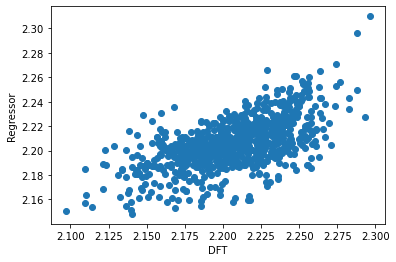

In [19]:
#Plot DFT mixing energy vs regressor predicted.
plt.scatter(ytest, ypred)
plt.xlabel('DFT')
plt.ylabel('Regressor')
#plt.savefig('BGE_pred_vs_val.png')

In [20]:
# Export data. 
df_data = pd.DataFrame()
df_data['ytest'] = ytest
df_data['ypred'] = ypred
df_data.to_excel('data.xlsx')

In [21]:
# Print time taken by program to run. 
time_s = round((time.time() - start_time), 2)
time_m = round((time_s/60), 2)
print(time_s,'sec')
print(time_m, 'min')

1.38 sec
0.02 min
